In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the cleaned data
file_path = 'data/data_clean.csv'
data = pd.read_csv(file_path)


# Normalizing the features
feature_scaler = StandardScaler()
features = data[['robot_speed', 'layer_height', 'layer_width']]
features = feature_scaler.fit_transform(features)
targets = data[['extrusion_speed']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Model definition
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [3]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=2, validation_split=0.2)#, callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1702609295.826977  239745 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 - 9s - loss: 116.2075 - val_loss: 102.8800 - 9s/epoch - 210ms/step
Epoch 2/100
41/41 - 1s - loss: 82.1749 - val_loss: 58.4631 - 537ms/epoch - 13ms/step
Epoch 3/100
41/41 - 1s - loss: 38.9364 - val_loss: 19.4417 - 514ms/epoch - 13ms/step
Epoch 4/100
41/41 - 1s - loss: 15.2252 - val_loss: 12.6832 - 540ms/epoch - 13ms/step
Epoch 5/100
41/41 - 1s - loss: 11.2069 - val_loss: 10.4927 - 538ms/epoch - 13ms/step
Epoch 6/100
41/41 - 1s - loss: 9.1572 - val_loss: 8.3819 - 506ms/epoch - 12ms/step
Epoch 7/100
41/41 - 1s - loss: 7.3634 - val_loss: 6.6765 - 517ms/epoch - 13ms/step
Epoch 8/100
41/41 - 1s - loss: 5.8395 - val_loss: 5.3107 - 511ms/epoch - 12ms/step
Epoch 9/100
41/41 - 1s - loss: 4.6321 - val_loss: 4.0974 - 513ms/epoch - 13ms/step
Epoch 10/100
41/41 - 1s - loss: 3.6280 - val_loss: 3.2250 - 507ms/epoch - 12ms/step
Epoch 11/100
41/41 - 1s - loss: 2.8110 - val_loss: 2.4359 - 521ms/epoch - 13ms/step
Epoch 12/100
41/41 - 1s - loss: 2.2026 - val_loss: 1.8661 - 505ms/epoch - 12ms/step
Epo

In [4]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.4111


0.41108477115631104

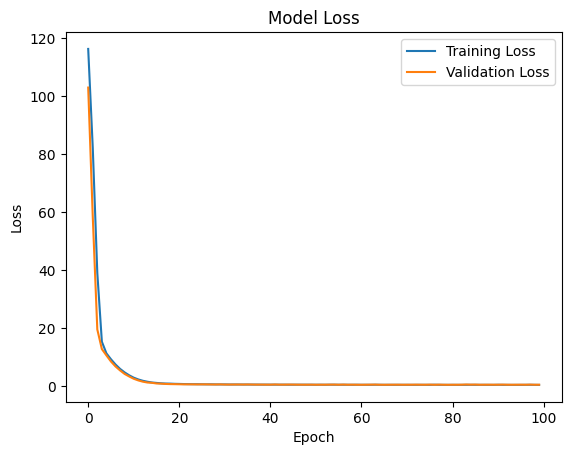

In [5]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [11]:
# # Optionally, you can save your model
# model.save('model/mycoprint.keras')

In [7]:
robot_speed_test = np.arange(8,29)
layer_height_test = np.repeat(5, robot_speed_test.shape[0])
layer_width_test = np.repeat(8, robot_speed_test.shape[0])

test_data = pd.DataFrame({
    'robot_speed': robot_speed_test,
    'layer_height': layer_height_test,
    'layer_width': layer_width_test
})

In [8]:
test_scaled = feature_scaler.transform(test_data)

pred_extrusion_speed = model.predict(test_scaled)

1/1 [==============================] - 0s 126ms/step


In [9]:
test_data["do_prediction"] = np.floor((pred_extrusion_speed-6)*10)
test_data["rpm_prediction"] = pred_extrusion_speed

test_data.to_csv('validation_test.csv', index=False)
test_data

,robot_speed,layer_height,layer_width,do_prediction,rpm_prediction
0,8,5,8,32.0,9.220213
1,9,5,8,32.0,9.289616
2,10,5,8,33.0,9.354748
3,11,5,8,34.0,9.419880
4,12,5,8,34.0,9.485012
5,13,5,8,35.0,9.559021
6,14,5,8,36.0,9.691427
7,15,5,8,38.0,9.860976
8,16,5,8,40.0,10.099317
9,17,5,8,44.0,10.463386
